### Neural Network

Camada de saída usa função de ativação linear

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
base = pd.read_csv('../../data/plano_saude2.csv')
base.head()

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150


In [5]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

In [6]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [9]:
regressor = MLPRegressor()
regressor.fit(X, y)
regressor.score(X, y)

0.8731504604625474

Text(0.5, 1.0, 'Redes Neurais')

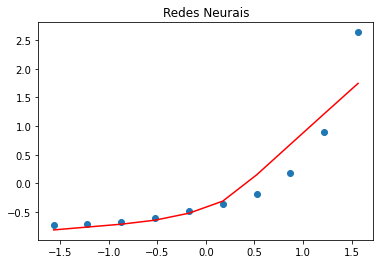

In [12]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Redes Neurais')

In [35]:
idade = scaler_x.transform([[40]])
previsao = scaler_y.inverse_transform(regressor.predict(idade))
previsao

array([1265.04287966])

### Avaliação de algoritmos de regressão

Para uma correta avaliação de um algoritmo você pode seguir os mesmos passos apresentados nas aulas sobre classificação, ou seja:

- Utilizar validação cruzada ao invés de dividir a base em porções para treinamento e teste
- Executar pelo menos 30 testes com cada algoritmo, utilizando o valor retornado pelo score (opcionalmente você pode usar o mean_absolute_error)
- Construir a planilha com os resultados, calculando a média dos 30 testes de cada algoritmo
- Fazer os testes de Friedmann e Nemenyi para verificar se existe diferença estatística significativa entre os resultados

Por fim, por meio dos resultados escolher o melhor algoritmo

No módulo sobre classificação também foram apresentados os conceitos sobre combinação e rejeição de classificadores, que também podem ser utilizados para problemas de regressão. As diferenças são:

- Na combinação de regressores, você deve obter o valor da previsão numérica de cada algoritmo e calcular a média para calcular o valor final
- Na rejeição de regressores, você pode estipular um valor mínimo para o mean_absolute_error, e caso o valor previsto seja maior que esse parâmetro você pode ignorar a resposta do regressor